In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import cm
import pandas as pd
from tabulate import tabulate

# Option Returns


***
***
Assume that the return on a non-dividend paying stock follows a stochastic differential equation:

dS=μSdt + σSdW

Where dS is the dollar change in the stock price over the small increment of time dt, and dW is
the increment of a Brownian motion (i.e., a draw from a standard normal random variable).

Simulate 25 price paths for the stock over the course of two months (42 trading days), using dt = 1 day.
Assume the starting value of the stock is S0 = 100 in all simulations. Use parameters μ = 0.10 and σ = 0.30.
***
***

In [3]:
mu = 0.10
sigma = 0.30
dt = 1/255
S = 100
T = 42
sim = 25

#dS = (mu * S * dt) + (sigma * S * DW)

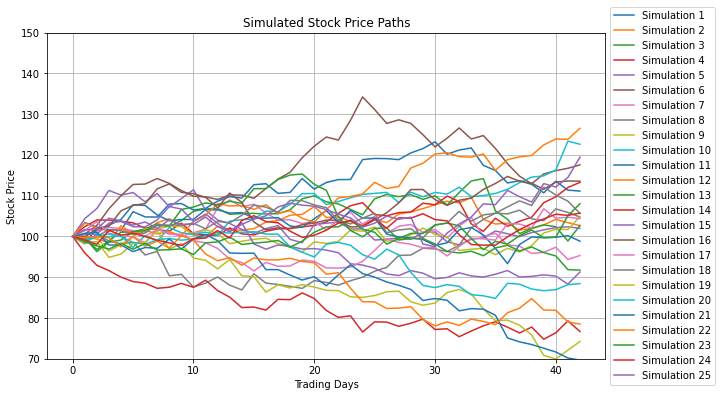

In [4]:
def simulate_stock_paths(mu, sigma, S, T, dt, sim):
    stock_paths = np.zeros((int(T)+1, sim))
    stock_paths[0] = S
    
    for i in range(1, int(T)+1):
        dW = np.random.normal(0, np.sqrt(dt), (sim,))
        dS = mu * stock_paths[i-1] * dt + sigma * stock_paths[i-1] * dW
        stock_paths[i] = stock_paths[i-1] + dS
    
    return stock_paths

stock_paths = simulate_stock_paths(mu, sigma, S, T, dt, sim)
# Plot stock price paths
plt.figure(figsize=(10, 6))
for i in range(sim):
    plt.plot(range(T+1), stock_paths[:, i], label=f'Simulation {i+1}')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Paths')
plt.ylim(70, 150)  # Adjust the limits of the y-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()







***
***
On each day and in each simulation, find the Black-Scholes price for each of three
European call options expiring at the end of the sample path: (1) an option with K = 95,
(2) an option with K = 100, (3) an option with K = 105. Assume a constant risk-free rate
of r = 2 percent per year.
***
***

In [5]:
def black_scholes_call_price(S, K, r, sigma, T):
    # Implementation of the Black-Scholes call option pricing formula
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# calculate options price

In [6]:
K_values = [95,100,105]
r = 0.02

all_option_prices = np.zeros((len(K_values), int(T)+1, sim))

for i in range(int(T)+1):
    for j, K in enumerate(K_values):
        for l in range(sim):
            T_remaining = T - i * dt
            all_option_prices[j, i] = black_scholes_call_price(stock_paths[i], K, r, sigma, T_remaining)
#print(option_prices.shape)


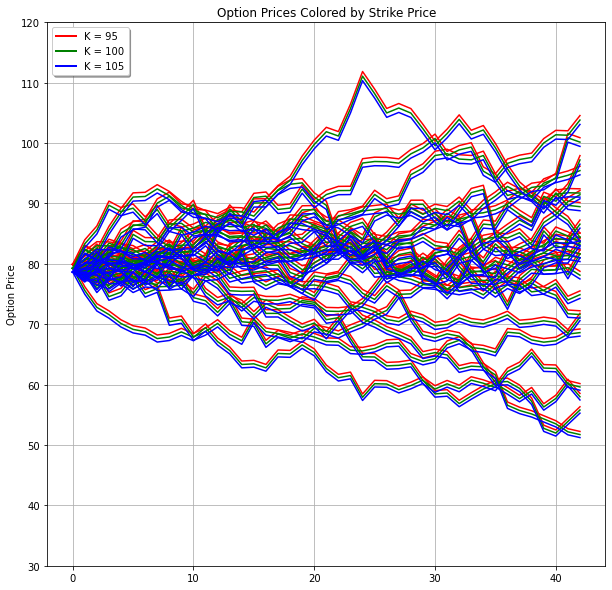

In [7]:
time_intervals = [f'Day {i}' for i in range(int(T)+1)]



# Graph the options prices and color by strike price
plt.figure(figsize=(10, 10))
colors = ['red', 'green', 'blue']
# Graph the options prices and color by strike price
for j, K in enumerate(K_values):
    plt.plot(range(int(T)+1), all_option_prices[j], label=f'K = {K}', color=colors[j])
plt.ylim(30, 120)
plt.ylabel('Time Steps')
plt.ylabel('Option Price')
plt.title('Option Prices Colored by Strike Price')

legend_handles = [plt.Line2D([0], [0], color=colors[i], lw=2, label=f'K = {K_values[i]}') for i in range(len(K_values))]

plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0, 1), fancybox=True, shadow=True, ncol=1)

plt.grid(True)
plt.show()


In [15]:
# Create lists to store data
index_numbers = []
simulation_numbers = []
day_numbers = []
option_prices_95 = []
option_prices_100 = []
option_prices_105 = []

# Iterate over the data and extract information
for j, K in enumerate(K_values):
    for i in range(int(T) + 1):
        for l in range(sim):
            index_numbers.append(len(index_numbers) + 1)
            simulation_numbers.append(l+1)
            day_numbers.append(i)
            option_prices_95.append(all_option_prices[0, i, l])  # Option price for K=95
            option_prices_100.append(all_option_prices[1, i, l])  # Option price for K=100
            option_prices_105.append(all_option_prices[2, i, l])  # Option price for K=105

# Create a DataFrame
data = {
    'Index': index_numbers,
    'Sim #': simulation_numbers,
    'Day #': day_numbers,
    'Option Price for K=95': option_prices_95,
    'Option Price for K=100': option_prices_100,
    'Option Price for K=105': option_prices_105,
}
for _ in range(2150):
    index_numbers.pop()
    simulation_numbers.pop()
    day_numbers.pop()
    option_prices_95.pop()
    option_prices_100.pop()
    option_prices_105.pop()

# Display the DataFrame using tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))


+---------+---------+---------+-------------------------+--------------------------+--------------------------+
|   Index |   Sim # |   Day # |   Option Price for K=95 |   Option Price for K=100 |   Option Price for K=105 |
|---------+---------+---------+-------------------------+--------------------------+--------------------------|
|       1 |       1 |       0 |                 79.9149 |                  79.2692 |                  78.6427 |
|       2 |       2 |       0 |                 79.9149 |                  79.2692 |                  78.6427 |
|       3 |       3 |       0 |                 79.9149 |                  79.2692 |                  78.6427 |
|       4 |       4 |       0 |                 79.9149 |                  79.2692 |                  78.6427 |
|       5 |       5 |       0 |                 79.9149 |                  79.2692 |                  78.6427 |
|       6 |       6 |       0 |                 79.9149 |                  79.2692 |                  78

In [17]:
mean_option_prices = np.zeros((len(K_values),T+1))

for i in range(T+1):
    for j, K in enumerate(K_values):
        for l in range(sim):
            T_remaining = T - i * dt
            mean_option_prices[j, i] = np.mean(black_scholes_call_price(stock_paths[i], K, r, sigma, T_remaining))

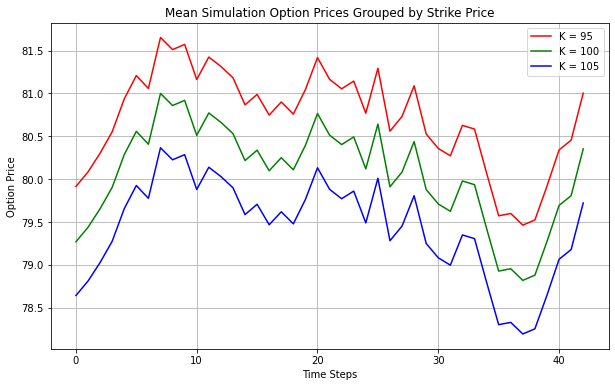

In [18]:
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))
for j, K in enumerate(K_values):
    plt.plot(range(int(T)+1), mean_option_prices[j], label=f'K = {K}', color=colors[j])
plt.xlabel('Time Steps')
plt.ylabel('Option Price')
plt.title('Mean Simulation Option Prices Grouped by Strike Price')
plt.legend()
plt.grid(True)
plt.show()

# 3c)

***
***
Compute the daily returns to each option, 
dV/V, where dV is the change from the
previous option price V to the current price.  
***
***

In [19]:
daily_returns_by_strike = []

# Iterate over each strike price
for j, K in enumerate(K_values):
    # Initialize an array to store daily returns for the current strike price
    daily_returns_strike = np.zeros((sim, int(T) + 1))
    
    # Filter option prices for the current strike price
    option_prices_strike = all_option_prices[j]

    # Iterate over each simulation
    for l in range(sim):
        # Iterate over each trading day
        for i in range(int(T) + 1):
            # Calculate daily returns for all days except the first one
            if i > 0:
                daily_returns_strike[l, i] = (option_prices_strike[i, l] - option_prices_strike[i-1, l]) / option_prices_strike[i-1, l]

    # Append the daily returns for the current strike price to the list
    daily_returns_by_strike.append(daily_returns_strike)

# Print the shape of the last daily returns array to verify
#print(daily_returns_by_strike)

for j, K in enumerate(K_values):
    print(f"Daily Returns for Strike Price {K}:")
    # Iterate over each simulation
    for sim in range(sim):
        print(f"Simulation {sim + 1}:")
        # Iterate over each trading day
        for day in range(int(T) + 1):
            print(f"Day {day}: {daily_returns_by_strike[j][sim, day]}")

Daily Returns for Strike Price 95:
Simulation 1:
Day 0: 0.0
Day 1: 0.0395644730410269
Day 2: -0.012829563667614575
Day 3: -0.007080299690277229
Day 4: -0.0013662810974429001
Day 5: 0.05185229004625479
Day 6: -0.013941487657804893
Day 7: -0.0004670291048972199
Day 8: 0.03502822148173527
Day 9: 0.0014175700800549348
Day 10: -0.016855840466436157
Day 11: 0.004184137024216995
Day 12: 0.019331100125164688
Day 13: 0.01138151640733867
Day 14: -0.0036999491450953547
Day 15: 0.03458076051589533
Day 16: 0.0023912471148383714
Day 17: -0.02398781303090299
Day 18: 0.002503685146106389
Day 19: 0.03521137676179327
Day 20: -0.02612167808175048
Day 21: 0.016700228770161567
Day 22: 0.007177736690501255
Day 23: 0.00021096778435623141
Day 24: 0.0491097818279757
Day 25: 0.0026074782293017337
Day 26: -0.0003914904397131728
Day 27: -0.002417247937215964
Day 28: 0.01584748688468296
Day 29: 0.010058174890529785
Day 30: 0.015549060793879103
Day 31: -0.028190413678916146
Day 32: 0.009806239704703719
Day 33: 0.00

***
***
Compute the mean and volatility of the stock
return and each options’ returns across all simulations.
***
***

In [20]:
option_returns = np.diff(all_option_prices, axis=1) / all_option_prices[:, :-1]

# Compute mean and volatility of stock returns
stock_returns = np.diff(stock_paths, axis=1) / stock_paths[:, :-1]
stock_returns_mean = np.mean(stock_returns)
stock_returns_volatility = np.std(stock_returns)

# Compute mean and volatility of each option's returns
option_returns_mean = np.mean(option_returns, axis=(1, 2))  # Calculate mean across simulations and days
option_returns_volatility = np.std(option_returns, axis=(1, 2))  # Calculate volatility across simulations and days



# Print mean and volatility of stock returns
print(f"Mean of Stock Returns: {stock_returns_mean}")
print(f"Volatility of Stock Returns: {stock_returns_volatility}")

# Print mean and volatility of each option's returns
for j, K in enumerate(K_values):
    print(f"Mean of Option Returns for K={K}: {option_returns_mean[j]}")
    print(f"Volatility of Option Returns for K={K}: {option_returns_volatility[j]}")
    


Mean of Stock Returns: 0.004460621814507529
Volatility of Stock Returns: 0.11821941149133641
Mean of Option Returns for K=95: 0.00019566775993028331
Volatility of Option Returns for K=95: 0.021904326047910424
Mean of Option Returns for K=100: 0.0001960044638864436
Volatility of Option Returns for K=100: 0.021990793045637193
Mean of Option Returns for K=105: 0.00019633383871075233
Volatility of Option Returns for K=105: 0.022074568198826777


In [21]:
# Stock volatility much higher than option volatility (~10% vs ~2%), stock mean returns are much higher
# K=105 options have highest mean returns and highest volatility 
# Mean returns and volatility increase as strike price increases --> trend

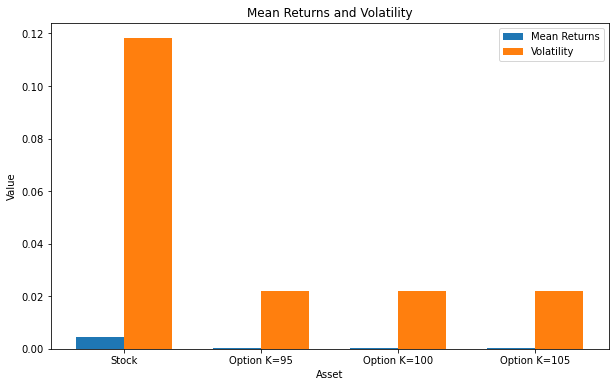

In [22]:
labels = ['Stock'] + [f'Option K={K}' for K in K_values]
mean_returns = [stock_returns_mean] + list(option_returns_mean)
volatilities = [stock_returns_volatility] + list(option_returns_volatility)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#print(option_returns_mean)


max_volatility = max(volatilities)
max_mean_return = max(mean_returns)



# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mean_returns, width, label='Mean Returns')
rects2 = ax.bar(x + width/2, volatilities, width, label='Volatility')

#if max_volatility > 2 * max_mean_return:
#    ax.set_ylim(0, 2 * max_volatility)
    
ax.set_xlabel('Asset')
ax.set_ylabel('Value')
ax.set_title('Mean Returns and Volatility')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

***
***
Plot the distributions of the stock
return and each options’ returns (across all simulations) in a single histogram.
***
***

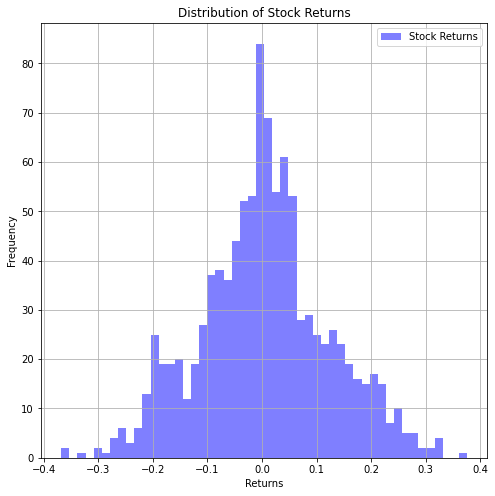

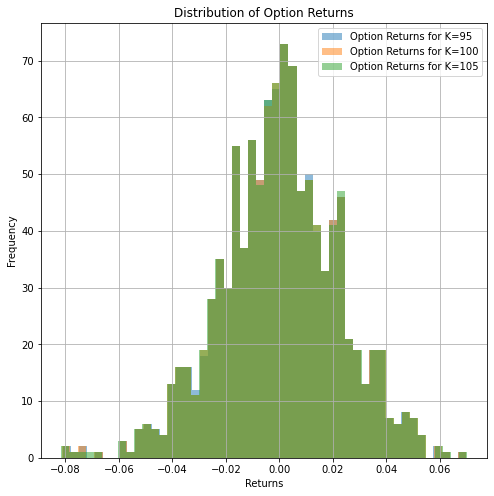

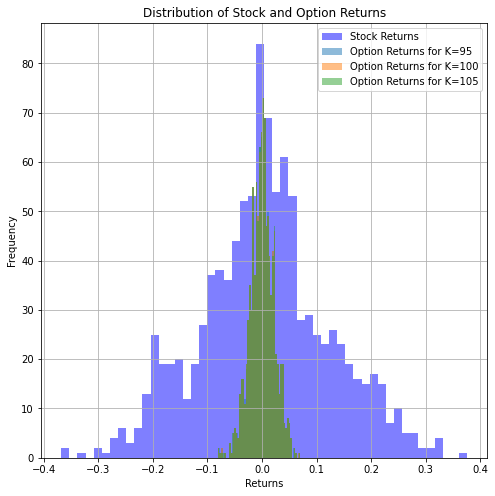

In [23]:
# Plot histogram of stock returns
plt.figure(figsize=(8, 8))
plt.hist(stock_returns.flatten(), bins=50, alpha=0.5, color='blue', label='Stock Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Returns')
plt.legend()
plt.grid(True)
plt.show()

# Plot histograms of option returns
plt.figure(figsize=(8, 8))
for j, K in enumerate(K_values):
    plt.hist(option_returns[j].flatten(), bins=50, alpha=0.5, label=f'Option Returns for K={K}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Option Returns')
plt.legend()
plt.grid(True)
plt.show()

# Plot histograms of stock and option returns together
plt.figure(figsize=(8, 8))
plt.hist(stock_returns.flatten(), bins=50, alpha=0.5, color='blue', label='Stock Returns')
for j, K in enumerate(K_values):
    plt.hist(option_returns[j].flatten(), bins=50, alpha=0.5, label=f'Option Returns for K={K}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Stock and Option Returns')
plt.legend()
plt.grid(True)
plt.show()


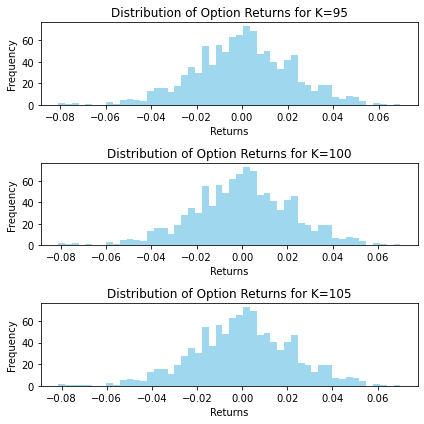

In [24]:
# Create subplots for each strike price
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

# Plot distributions of option returns for each strike price
for j, ax in enumerate(axs):
    ax.hist(option_returns[j].flatten(), bins=50, alpha=0.8, color='skyblue')  # Adjust alpha and color as needed
    ax.set_xlabel('Returns')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Option Returns for K={K_values[j]}')

plt.tight_layout()
plt.show()



***
***
What can you conclude about the risk profile of option returns vis-à-vis the stock return? What about option returns as a function of moneyness?
***
***

Stock volatility is much higher than option volatility (~10% vs ~2%), while stock mean returns are much higher than option mean returns as well. K=105 options have highest mean returns and highest volatility among the 3 options, and mean returns and volatility appear to increase as strike price increases. Looking at the distributions, it is clear that stock and option returns roughly follow a normal distribution with the most frequent values centered around 0. The distribution of stock returns has more variation and wider spread than the options returns distributions, and therefore more volatile. Option returns, being less volatile, can exhibit asymmetric risk profiles due to their non-linear payoff structures. In addition, the degree of leverage options provide and the impact implied volatility has both play roles in option return differences. Risk is not necessarily lower for options, but it can be noted that effectively using options strategies to hedge risk is feasible. Option returns can also vary depending on the moneyness of the option - in-the-money (ITM), at-the-money (ATM), and out-of-the-money (OTM). The more ITM the option is, the higher the intrinsic value and resulting premium are as the stock price is higher than the strike price. K=95 options are more likely to be ITM than the other options, and therefore result in higher mean prices. However, again, K=105 options, which are more OTM than the other options, have higher mean returns. Overall, the relationship between moneyness and returns is complex and investors must consider different possible stock price paths when selecting option strike prices.

# Binomial Tree Pricing



***
***
Construct a five-step binomial tree to evaluate the prices of a European and American-style put
on a non-dividend paying stock. Parameters: S0 = 100, K = 100, T = 0.25, r = 0.05, σ = 0.50.
***
***

In [25]:
S = 100   # Current stock price
K = 100   # Strike price
r = 0.05  # Risk-free interest rate
T = 0.25   # Time to expiration (in years)
sigma = 0.50  # Volatility
steps = 5     # Number of steps

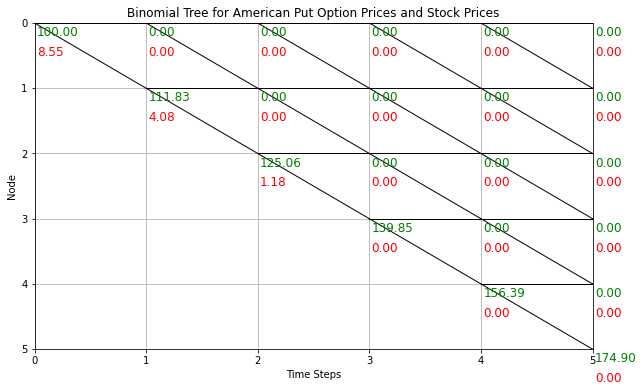

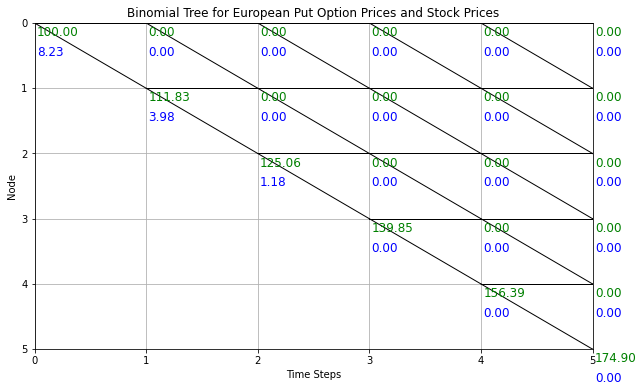


Stock Prices:
[[100.           0.           0.           0.           0.
    0.        ]
 [ 89.42200449 111.82929814   0.           0.           0.
    0.        ]
 [ 79.96294887 100.         125.05791922   0.           0.
    0.        ]
 [ 71.50447173  89.42200449 111.82929814 139.85139333   0.
    0.        ]
 [ 63.94073192  79.96294887 100.         125.05791922 156.39483159
    0.        ]
 [ 57.17708416  71.50447173  89.42200449 111.82929814 139.85139333
  174.89524249]]

American Put Option Prices:
[[ 8.55126808  0.          0.          0.          0.          0.        ]
 [13.38047778  4.07656296  0.          0.          0.          0.        ]
 [20.06955866  7.18987135  1.18484022  0.          0.          0.        ]
 [28.49552827 12.28706946  2.4579572   0.          0.          0.        ]
 [36.05926808 20.03705113  5.09904504  0.          0.          0.        ]
 [42.82291584 28.49552827 10.57799551  0.          0.          0.        ]]

European Put Option Prices:
[[ 8.2280

In [26]:
def binomial_tree(S, K, r, T, sigma, steps):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Step 2: Initialize arrays to store option prices
    option_prices_european = np.zeros((steps + 1, steps + 1))  # European put option prices
    option_prices_american = np.zeros((steps + 1, steps + 1))  # American put option prices
    stock_prices = np.zeros((steps + 1, steps + 1))  # Stock prices
    
    # Step 3: Construct the binomial tree for option prices
    for j in range(steps + 1):
        stock_prices[steps, j] = S * (u ** j) * (d ** (steps - j))
        option_prices_european[steps, j] = max(0, K - stock_prices[steps, j])
        option_prices_american[steps, j] = max(0, K - stock_prices[steps, j])

    for i in range(steps - 1, -1, -1):
        for j in range(i + 1):
            stock_prices[i, j] = S * (u ** j) * (d ** (i - j))
            option_prices_european[i, j] = np.exp(-r * dt) * (p * option_prices_european[i + 1, j] +
                                                              (1 - p) * option_prices_european[i + 1, j + 1])
            intrinsic_value = max(0, K - stock_prices[i, j])
            option_prices_american[i, j] = max(intrinsic_value, np.exp(-r * dt) * (p * option_prices_american[i + 1, j] +
                                                                                   (1 - p) * option_prices_american[i + 1, j + 1]))

    return stock_prices, option_prices_european, option_prices_american

stock_prices, option_prices_european, option_prices_american = binomial_tree(S, K, r, T, sigma, steps)

# Plotting the binomial tree for American put option prices with stock prices
plt.figure(figsize=(10, 6))

for j in range(steps + 1):
    for i in range(j + 1):
        plt.plot([j, j+1], [i, i], color='black', lw=1)  # Horizontal lines
        plt.plot([j, j+1], [i, i+1], color='black', lw=1)  # Diagonal lines

for j in range(steps + 1):
    for i in range(j + 1):
        plt.text(j + 0.02, i + 0.5, f'{option_prices_american[i, j]:.2f}', fontsize=12, color = 'red')  # American put option prices
        plt.text(j + 0.02, i + 0.2, f'{stock_prices[i, j]:.2f}', fontsize=12, color='green')  # Stock prices

plt.title('Binomial Tree for American Put Option Prices and Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Node')
plt.xlim(0, steps)
plt.ylim(0, steps)
plt.gca().invert_yaxis()  # Invert y-axis to display the tree from top to bottom
plt.grid(True)
plt.show()
        


# Plot European put option prices
plt.figure(figsize=(10, 6))

for j in range(steps + 1):
    for i in range(j + 1):
        plt.plot([j, j+1], [i, i], color='black', lw=1)  # Horizontal lines
        plt.plot([j, j+1], [i, i+1], color='black', lw=1)  # Diagonal lines

for j in range(steps + 1):
    for i in range(j + 1):
        plt.text(j + 0.02, i + 0.5, f'{option_prices_european[i, j]:.2f}', fontsize=12, color='blue')  # European put option prices
        plt.text(j + 0.02, i + 0.2, f'{stock_prices[i, j]:.2f}', fontsize=12, color='green')  # Stock prices

plt.title('Binomial Tree for European Put Option Prices and Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Node')
plt.xlim(0, steps)
plt.ylim(0, steps)
plt.gca().invert_yaxis()  # Invert y-axis to display the tree from top to bottom
plt.grid(True)
plt.show()

print("\nStock Prices:")
print(stock_prices)
print("\nAmerican Put Option Prices:")
print(option_prices_american)
print("\nEuropean Put Option Prices:")
print(option_prices_european)




***
***
Find the option prices and verify that V_P_AM ≥ V_P_EU (value of American put is at least that of European put) holds at all nodes.
***
***

In [27]:
american_option_premium = option_prices_american - option_prices_european
print(american_option_premium)

[[0.32322109 0.         0.         0.         0.         0.        ]
 [0.5689004  0.09503508 0.         0.         0.         0.        ]
 [0.96936851 0.19715077 0.         0.         0.         0.        ]
 [1.57361629 0.40899031 0.         0.         0.         0.        ]
 [0.72847772 0.84845253 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


When subtracting the values of the American puts by the values of the European puts, there are no negative differences, verifying that the values of the American puts are all greater than or equal to the values of the European puts.


#
***
***
Vary the volatility parameter. What happens to the American option premium V_P_AM - V_P_EU
as volatility increases? Why?
***
***

In [28]:
#original sigma =  0.50  # Volatility
print("Original premium at sigma = 0.50",'\n',american_option_premium)

sigma = 0.75
stock_prices, option_prices_european, option_prices_american = binomial_tree(S, K, r, T, sigma, steps)
new_american_option_premium = option_prices_american - option_prices_european
print("New premium at sigma =",sigma,'\n',new_american_option_premium)


Original premium at sigma = 0.50 
 [[0.32322109 0.         0.         0.         0.         0.        ]
 [0.5689004  0.09503508 0.         0.         0.         0.        ]
 [0.96936851 0.19715077 0.         0.         0.         0.        ]
 [1.57361629 0.40899031 0.         0.         0.         0.        ]
 [0.72847772 0.84845253 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
New premium at sigma = 0.75 
 [[0.86291945 0.         0.         0.         0.         0.        ]
 [1.6391349  0.19067856 0.         0.         0.         0.        ]
 [3.05806743 0.41055834 0.         0.         0.         0.        ]
 [3.32779228 0.88399111 0.         0.         0.         0.        ]
 [1.43213728 1.90335989 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


As can be seen by the greater new American premium values induced by a 0.25 unit increase in volatility, the American option premium increases as volatility increases because the volatility increases the time value of American contracts as they can be exercised early, so a higher volatility increases the time value of the contract and the subsequent American premium.



***
***
Vary the time to maturity parameter. What happens to the American option premium
V_P_AM - V_P_EU as time to maturity decreases? Why?
***
***

In [29]:
#original time to maturity =  0.25  # T
print("Original premium at T = 0.25",'\n',american_option_premium)

T = 0.10
stock_prices, option_prices_european, option_prices_american = binomial_tree(S, K, r, T, sigma, steps)
new_american_option_premium = option_prices_american - option_prices_european
print("New premium at T =",T,'\n',new_american_option_premium)


Original premium at T = 0.25 
 [[0.32322109 0.         0.         0.         0.         0.        ]
 [0.5689004  0.09503508 0.         0.         0.         0.        ]
 [0.96936851 0.19715077 0.         0.         0.         0.        ]
 [1.57361629 0.40899031 0.         0.         0.         0.        ]
 [0.72847772 0.84845253 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
New premium at T = 0.1 
 [[0.32012907 0.         0.         0.         0.         0.        ]
 [0.56918734 0.09248063 0.         0.         0.         0.        ]
 [0.98020522 0.19358025 0.         0.         0.         0.        ]
 [1.55186645 0.40520177 0.         0.         0.         0.        ]
 [0.70515161 0.84816748 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


As can be seen by the lower new American premium values induced by a 0.15 unit decrease in time to maturity, the American option premium decreases as time to maturity decreases because the time to maturity increases the time value of American contracts, so a lower time to maturity decreases the time value of the contract and the subsequent American premium.



***
***
Compute the value of delta (using the binomial approximation) at each node.
***
***

In [30]:
american_delta_values = np.zeros_like(stock_prices)  # Initialize array to store American delta values
european_delta_values = np.zeros_like(stock_prices)  # Initialize array to store European delta values

# Compute delta for American option
for i in range(steps):
    for j in range(i + 1):
        # Compute change in option price for American option
        american_option_price_change = option_prices_american[i + 1, j] - option_prices_american[i + 1, j + 1]
        
        # Compute change in stock price
        stock_price_change = stock_prices[i + 1, j] - stock_prices[i + 1, j + 1]
        
        # Compute delta for American option
        american_delta = american_option_price_change / stock_price_change
        
        # Assign delta value to the corresponding node for American option
        american_delta_values[i, j] = american_delta

# Compute delta for European option
for i in range(steps):
    for j in range(i + 1):
        # Compute change in option price for European option
        european_option_price_change = option_prices_european[i + 1, j] - option_prices_european[i + 1, j + 1]
        
        # Compute delta for European option
        european_delta = european_option_price_change / stock_price_change
        
        # Assign delta value to the corresponding node for European option
        european_delta_values[i, j] = european_delta

print("American Put Option Deltas:")
print(american_delta_values)
print("European Put Option Deltas:")
print(european_delta_values)

American Put Option Deltas:
[[-0.4165863   0.          0.          0.          0.          0.        ]
 [-0.64649348 -0.23950289  0.          0.          0.          0.        ]
 [-0.90842782 -0.43950673 -0.08741366  0.          0.          0.        ]
 [-1.         -0.74847496 -0.20344801 -0.          0.          0.        ]
 [-1.         -1.         -0.47350833 -0.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]
European Put Option Deltas:
[[-0.25787713  0.          0.          0.          0.          0.        ]
 [-0.35618827 -0.16826929  0.          0.          0.          0.        ]
 [-0.44543766 -0.27507405 -0.07070522  0.          0.          0.        ]
 [-0.48034324 -0.41430075 -0.14800003 -0.          0.          0.        ]
 [-0.42804449 -0.52919616 -0.30979334 -0.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


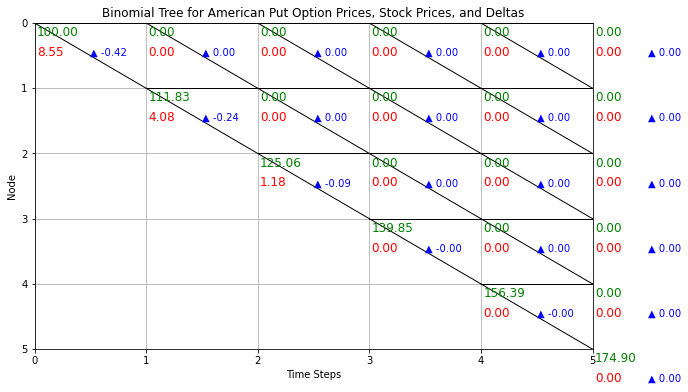

American Put Option Deltas:
[[-0.4165863   0.          0.          0.          0.          0.        ]
 [-0.64649348 -0.23950289  0.          0.          0.          0.        ]
 [-0.90842782 -0.43950673 -0.08741366  0.          0.          0.        ]
 [-1.         -0.74847496 -0.20344801 -0.          0.          0.        ]
 [-1.         -1.         -0.47350833 -0.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [94]:
sigma = 0.50
T = 0.25

stock_prices, option_prices_european, option_prices_american = binomial_tree(S, K, r, T, sigma, steps)


plt.figure(figsize=(10, 6))

for j in range(steps + 1):
    for i in range(j + 1):
        plt.plot([j, j+1], [i, i], color='black', lw=1)  # Horizontal lines
        plt.plot([j, j+1], [i, i+1], color='black', lw=1)  # Diagonal lines

for j in range(steps + 1):
    for i in range(j + 1):
        plt.text(j + 0.02, i + 0.5, f'{option_prices_american[i, j]:.2f}', fontsize=12, color = 'red')  # American put option prices
        plt.text(j + 0.02, i + 0.2, f'{stock_prices[i, j]:.2f}', fontsize=12, color='green')  # Stock prices
        plt.text(j + 0.5, i + 0.5, f'▲ {american_delta_values[i, j]:.2f}', fontsize=10, color='blue')  # Delta values

plt.title('Binomial Tree for American Put Option Prices, Stock Prices, and Deltas')
plt.xlabel('Time Steps')
plt.ylabel('Node')
plt.xlim(0, steps)
plt.ylim(0, steps)
plt.gca().invert_yaxis()  # Invert y-axis to display the tree from top to bottom
plt.grid(True)
plt.show()

print("American Put Option Deltas:")
print(american_delta_values)


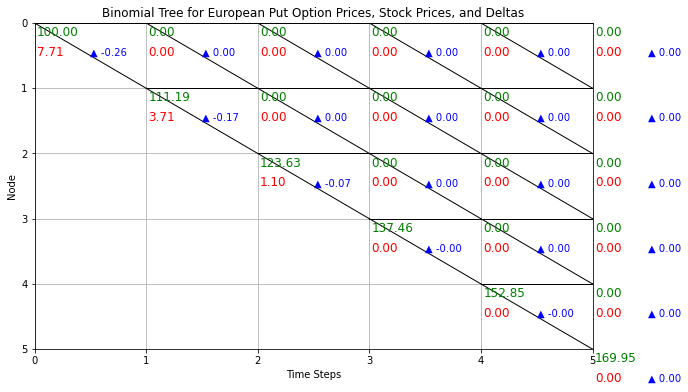

European Put Option Deltas:
[[-0.25787713  0.          0.          0.          0.          0.        ]
 [-0.35618827 -0.16826929  0.          0.          0.          0.        ]
 [-0.44543766 -0.27507405 -0.07070522  0.          0.          0.        ]
 [-0.48034324 -0.41430075 -0.14800003 -0.          0.          0.        ]
 [-0.42804449 -0.52919616 -0.30979334 -0.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [31]:
plt.figure(figsize=(10, 6))

for j in range(steps + 1):
    for i in range(j + 1):
        plt.plot([j, j+1], [i, i], color='black', lw=1)  # Horizontal lines
        plt.plot([j, j+1], [i, i+1], color='black', lw=1)  # Diagonal lines

for j in range(steps + 1):
    for i in range(j + 1):
        plt.text(j + 0.02, i + 0.5, f'{option_prices_european[i, j]:.2f}', fontsize=12, color = 'red')  # European put option prices
        plt.text(j + 0.02, i + 0.2, f'{stock_prices[i, j]:.2f}', fontsize=12, color='green')  # Stock prices
        plt.text(j + 0.5, i + 0.5, f'▲ {european_delta_values[i, j]:.2f}', fontsize=10, color='blue')  # Delta values

plt.title('Binomial Tree for European Put Option Prices, Stock Prices, and Deltas')
plt.xlabel('Time Steps')
plt.ylabel('Node')
plt.xlim(0, steps)
plt.ylim(0, steps)
plt.gca().invert_yaxis()  # Invert y-axis to display the tree from top to bottom
plt.grid(True)
plt.show()

print("European Put Option Deltas:")
print(european_delta_values)


***
***
Without a formula for the approximate option gamma at each node of the binomial
tree, how might you approximate gamma?
***
***

In [32]:
##think like second derivative, calculate change in delta over change in stock

def calculate_gamma(stock_prices, option_prices, steps):
    gamma = np.zeros((steps + 1, steps + 1))
    
    # Calculate the change in delta between adjacent nodes
    delta_delta = np.diff(option_prices, axis=1)
    
    # Calculate the change in stock price between adjacent nodes
    delta_stock = np.diff(stock_prices, axis=1)
    
    # Avoid division by zero and handle NaN values
    with np.errstate(divide='ignore', invalid='ignore'):
        gamma[:, :-1] = np.where(delta_stock != 0, delta_delta / delta_stock, 0)
    
    return gamma

# Assuming you already have the stock_prices, option_prices, and steps
american_gamma = calculate_gamma(stock_prices, option_prices_american, steps)
european_gamma = calculate_gamma(stock_prices, option_prices_european, steps)

# Print gamma values
print("American Put Option Gamma:")
print(american_gamma)
print("\nEuropean Put Option Gamma:")
print(european_gamma)


American Put Option Gamma:
[[ 0.08025999  0.          0.          0.          0.          0.        ]
 [-0.4165863   0.03417628  0.          0.          0.          0.        ]
 [-0.64649348 -0.23950289  0.00887543  0.          0.          0.        ]
 [-0.90842782 -0.43950673 -0.08741366 -0.          0.          0.        ]
 [-1.         -0.74847496 -0.20344801  0.         -0.          0.        ]
 [-1.         -1.         -0.47350833  0.          0.          0.        ]]

European Put Option Gamma:
[[ 0.0770587   0.          0.          0.          0.          0.        ]
 [-0.39415621  0.03334454  0.          0.          0.          0.        ]
 [-0.60533954 -0.23131113  0.00887543  0.          0.          0.        ]
 [-0.84172504 -0.42044111 -0.08741366 -0.          0.          0.        ]
 [-1.0092503  -0.7041013  -0.20344801  0.         -0.          0.        ]
 [-1.         -1.         -0.47350833  0.          0.          0.        ]]


***
***
Can you show the gamma “surface” with
respect to time and moneyness on a 3D axis?
***
***

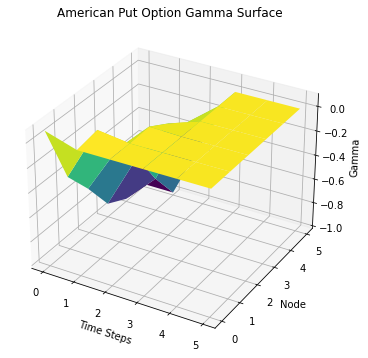

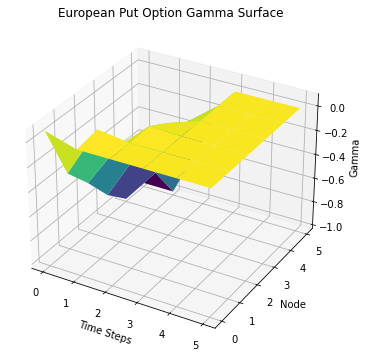

In [33]:
X, Y = np.meshgrid(np.arange(steps + 1), np.arange(steps + 1))

# Plot American Put Option Gamma
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, american_gamma, cmap='viridis')
ax.set_title('American Put Option Gamma Surface')
ax.set_xlabel('Time Steps')
ax.set_ylabel('Node')
ax.set_zlabel('Gamma')
plt.show()

# Plot European Put Option Gamma
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, european_gamma, cmap='viridis')
ax.set_title('European Put Option Gamma Surface')
ax.set_xlabel('Time Steps')
ax.set_ylabel('Node')
ax.set_zlabel('Gamma')
plt.show()
